In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#Read the csv
df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [94]:
#Shape of the dataframe
df.shape

(39717, 111)

In [95]:
#colmns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [96]:
missing_columns = df.isnull().sum() / len(df.id)

In [97]:
#columns with 50% missing
missing_colums_50 = df.columns[(df.isnull().sum() / len(df.id)) > 0.5]

In [98]:
missing_colums_50

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [99]:
#dropping columns with atleast 50% missing values
df = df.drop(missing_colums_50, axis=1)

In [100]:
df.shape

(39717, 54)

In [101]:
#refinding the missing columns
missing_columns = df.isnull().sum() / len(df.id)

In [102]:
#all colummns with missing values
missing_columns[missing_columns > 0]

emp_title                     0.061913
emp_length                    0.027066
desc                          0.325855
title                         0.000277
revol_util                    0.001259
last_pymnt_d                  0.001788
last_credit_pull_d            0.000050
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
pub_rec_bankruptcies          0.017549
tax_liens                     0.000982
dtype: float64

In [103]:
#dropping desc which has more than 30% missing
df = df.drop('desc',axis=1)

In [104]:
df.shape

(39717, 53)

In [105]:
#Removing rows with null emp_title
df = df.drop('emp_title',axis=1)
df.shape

(39717, 52)

In [106]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [107]:
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [108]:
emp_length_conversions = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [109]:
#converting the emp_length to numeric values for analysis
df = df.replace({"emp_length": emp_length_conversions })

In [110]:
df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [111]:
df['emp_length'].describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [112]:
#filling missing values with median
df['emp_length'] = df['emp_length'].fillna('4')

In [113]:
df['emp_length'].describe()

count     39717.0
unique       12.0
top          10.0
freq       8879.0
Name: emp_length, dtype: float64

In [114]:
#confirming no missing values in emp_length
df['emp_length'].isnull().sum()

0

In [115]:
df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
4       1075
Name: count, dtype: int64

In [116]:
#Finding remaining missing columns
missing_columns = df.isnull().sum() / len(df.id)
missing_columns = missing_columns[missing_columns > 0]
missing_columns

title                         0.000277
revol_util                    0.001259
last_pymnt_d                  0.001788
last_credit_pull_d            0.000050
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
pub_rec_bankruptcies          0.017549
tax_liens                     0.000982
dtype: float64

In [117]:
#Analysing pub_rec_bankruptcies which is the next highest missing columns
df['pub_rec_bankruptcies'].value_counts()
#Highest received bankruptcies are 0 hence replacing null with 0
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

In [118]:
#Analysing the missing values in last_pymnt_d
df['last_pymnt_d'].value_counts()
#removing the rows with null values in last_payment_date as these are mostly invalid rows
df = df[~df['last_pymnt_d'].isnull()]
#Converting the 
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

In [119]:
#Analysing the missing values in collections_12_mths_ex_med
df['collections_12_mths_ex_med'].value_counts()
#All values are either 0 or null dropping this column
df = df.drop('collections_12_mths_ex_med',axis=1)

In [120]:
#Analysing the missing values in chargeoff_within_12_mths
df['chargeoff_within_12_mths'].value_counts()
#All values are either 0 or null dropping this column
df = df.drop('chargeoff_within_12_mths',axis=1)

In [121]:
#Analysing the missing values in revol_util
df['revol_util'].value_counts()
#Since most are 0% changing the null value to 0%
df['revol_util'] = df['revol_util'].fillna('0%')
#Changing the number to float after removing %
df['revol_util'] = df['revol_util'].str[:-1].astype(float)

In [122]:
#Analysing the missing values in tax_lien
df['tax_liens'].value_counts()
#All values are either 0 or null dropping this column
df = df.drop('tax_liens',axis=1)

In [123]:
#Analysing the missing values in title
df['title'].value_counts()
#Removing rows with null title
df = df[~df['title'].isnull()]

In [124]:
one_unique_columns = df.columns[df.nunique() == 1]

In [125]:
one_unique_columns

Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [126]:
#removing all columns with all unique values as that wont be usefil in analysis
df = df.drop(one_unique_columns, axis=1)

In [127]:
df.shape

(39635, 43)

In [128]:
df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    12
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2597
dti                         2868
recoveries                  3987
annual_inc

In [129]:
df['term'].value_counts()

term
 36 months    29036
 60 months    10599
Name: count, dtype: int64

In [130]:
categorical_columns = df.columns[df.nunique() < 20]

In [131]:
#finding all categorical columns
categorical_columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

In [132]:
#Fixing the quantitative variables
#Fixing interest rates
df['int_rate'] = df['int_rate'].str[:-1].astype(float)


In [133]:
#Fixing last_credit_pull_d converting to datetime
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df['last_credit_pull_d']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_d, Length: 39635, dtype: datetime64[ns]

In [134]:
#Removing memberid,id,url columns whiah has all unique values won't contribute to analysis
df = df.drop(['member_id','url','id'],axis=1)

In [135]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39635, dtype: object

In [136]:
df['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 39635, dtype: object

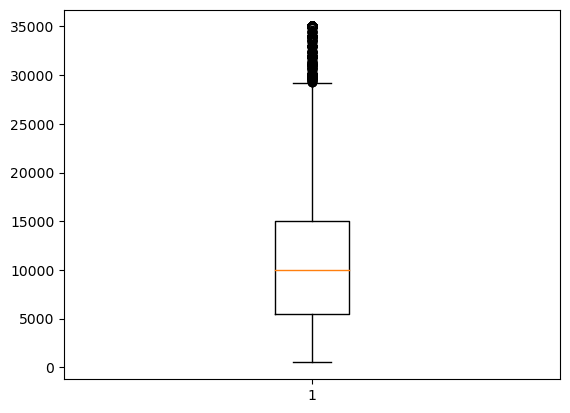

In [137]:
####Univariate Analysis start###
##Quantitative variables####
df['loan_amnt'].describe()
plt.boxplot(df['loan_amnt'])
plt.show()

#Median loan amount is around 10K , outliers lie in the range of 30k to 35K


In [138]:
#Find percentage outliers in loan_amount
df_loan_outlier = df[df['loan_amnt'] > 30000]

len(df_loan_outlier)/len(df) * 100

# 2% outliers in the loan disbursed

2.086539674530087

In [139]:
df['funded_amnt'].describe()
#funded amount distribution is similar to loan amount

count    39635.000000
mean     10953.029519
std       7185.814618
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [140]:
df['annual_inc'].describe()
##Too many outliers in annual income . Remove rows with annual income greater than 99% 
df['annual_inc'].quantile(.99)
##230K is the 99th percentile of annual income while the median is 10k.


235000.0

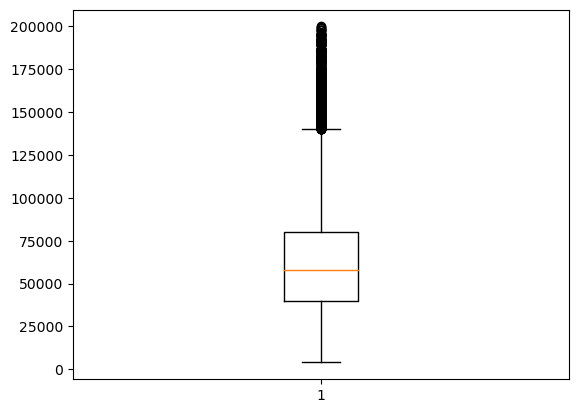

In [141]:
##Removing rows with annual income greater than 200K 
df = df[df['annual_inc'] < 200000]
df['annual_inc'].describe()
plt.boxplot(df['annual_inc'])
plt.show()

##After removal of very income salaries the box plot of annual income 
##Median range is 6k
##Salary of around 150k is at the higher ranges .. greater than 150K are outliers

In [142]:
##Analysing installment
df['total_pymnt'].describe()

count    38927.000000
mean     12003.941123
std       8872.339565
min         33.730000
25%       5560.615771
50%       9797.777982
75%      16347.046130
max      58563.679930
Name: total_pymnt, dtype: float64

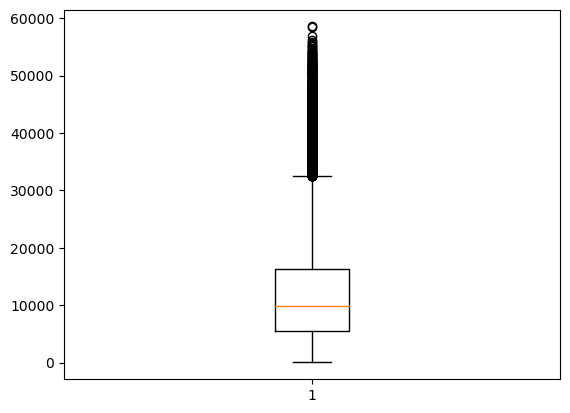

In [143]:

plt.boxplot(df['total_pymnt'])
plt.show()

In [144]:
##Analysing installment
df['total_pymnt_inv'].describe()


count    38927.000000
mean     11425.679051
std       8772.639921
min          0.000000
25%       5091.185000
50%       9201.930000
75%      15575.770000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

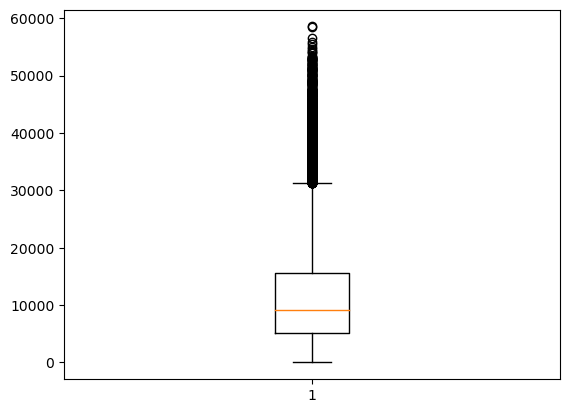

In [145]:
plt.boxplot(df['total_pymnt_inv'])
plt.show()

#Both total_pymnt and total_pymnt_inv have similar values will use total_pymnt for analysis

In [146]:
df['total_pymnt'] = df['total_pymnt'].apply(lambda x : round(x))
#Rounding off the total payment metric
df['total_pymnt'].describe()

count    38927.000000
mean     12003.941660
std       8872.339559
min         34.000000
25%       5560.500000
50%       9798.000000
75%      16347.000000
max      58564.000000
Name: total_pymnt, dtype: float64

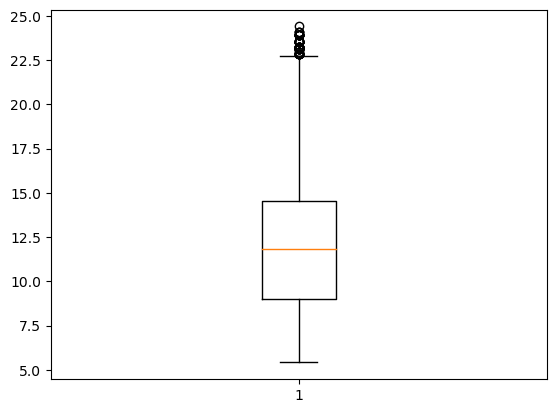

In [147]:
#Lets analyse the interest rates
df['int_rate'].describe()
plt.boxplot(df['int_rate'])
plt.show()
##While median interest rates are around 11.5% most interest rates lies below 15%. There are few outliers abive 22.5%

In [148]:
#Calculate percentage of outliers in interest rates
df_int_out = df[df['int_rate'] > 22.5]
len(df_int_out)/len(df)
#0.1 percent outliers in interest rates. Dropping outlier rows in interest rates
df = df[df['int_rate'] < 22.5]
df['int_rate'].describe()
df.shape

(38853, 40)

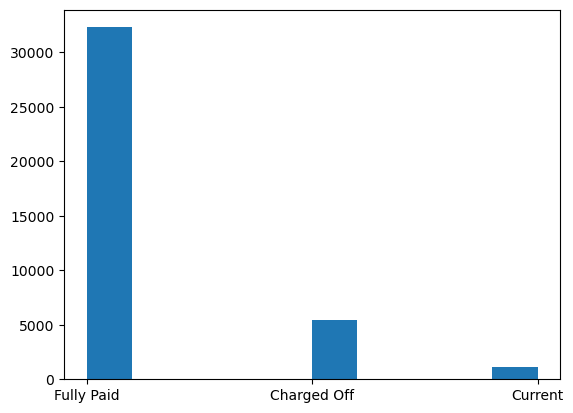

In [149]:
#Univariate analysis of Categorical variable (Unordered)
df['loan_status'].value_counts()
plt.hist(df['loan_status'])
plt.show()

#Majority of the loans are fully paid, there are very few current loans
#Around 13% loans are charged off

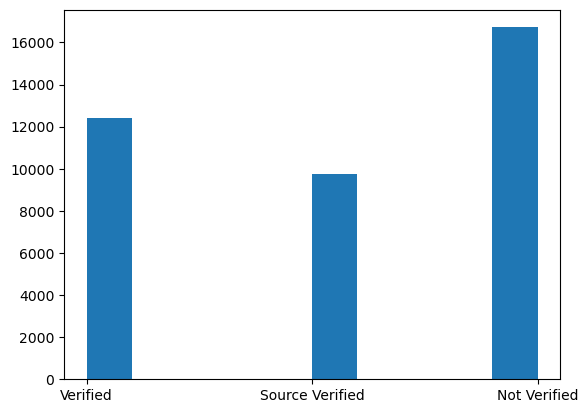

In [150]:
##Verification status###
df['verification_status'].value_counts()
plt.hist(df['verification_status'])
plt.show()

#Around 40% loans are there for which incomes are not verified.This might be a worrying sign for the company.

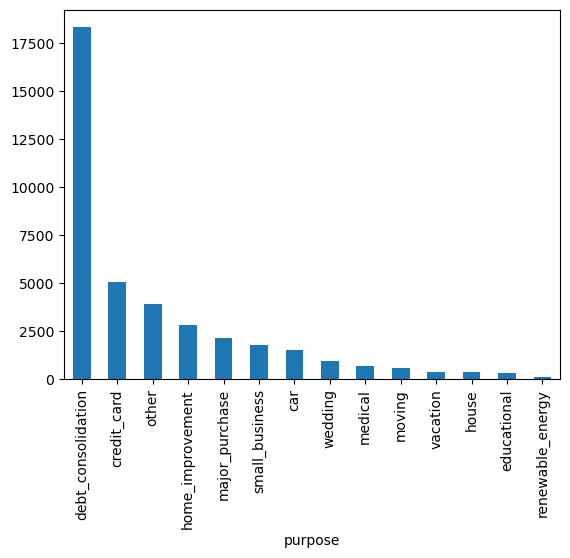

In [151]:
df['purpose'].value_counts().plot.bar()
plt.show()

#Most loans are for debt_consolidation.

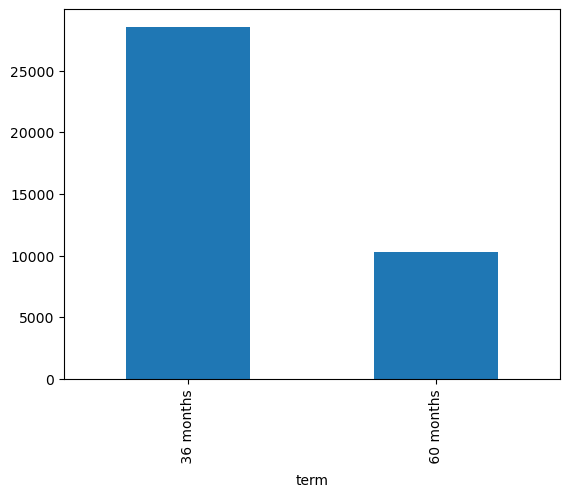

In [152]:
df['term'].value_counts().plot.bar()
plt.show()

#70% loans are taken for 3 year period

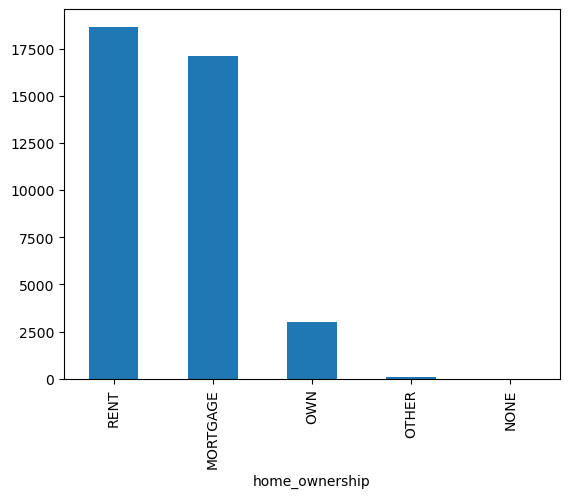

In [153]:
df['home_ownership'].value_counts().plot.bar()
plt.show()

#Only 6 percent of people applying for loans have own house.This is a deciding factor in loan disbursement

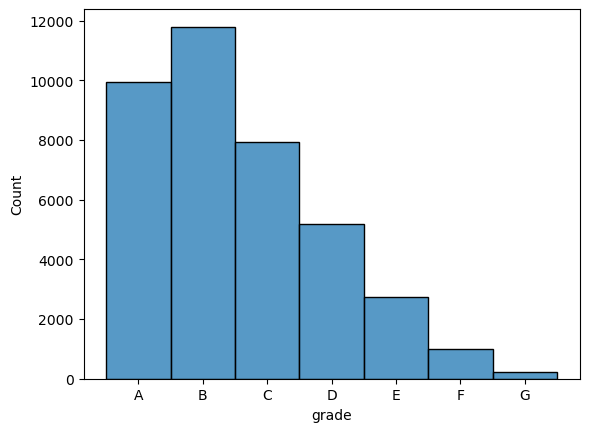

In [158]:
###Univariate analysis for ordered categorical variables ######
df['grade'].value_counts()
df = df.sort_values(by='grade')
sns.histplot(df['grade'])
plt.show()

##Most loans have grades A,B and C with maximum at B.The count increase from A to B and then decrease gradually.Very few loand oflow grades implies loans 
##are not aprooved for high risk individuals which is a good sign for the company

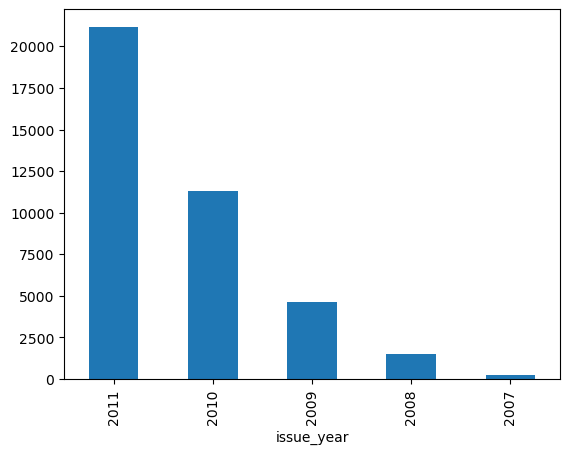

In [160]:
##Anlysis based on Loan issue date###
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'].value_counts().plot.bar()
plt.show()

#Number of sanctioned loans are exponentially increasing over a period from 2007 to 2011

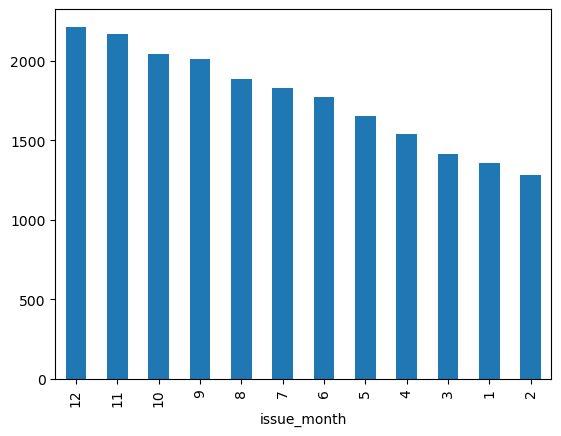

In [161]:
##Find for which month more loans are disbursed in 2011##
df_2011 = df[df['issue_year'] == 2011]
df_2011.sort_values(by='issue_month')
df_2011['issue_month'].value_counts().plot.bar()
plt.show()

#Loan disbursement gradually increases from starting to the end of year in 2011.Maximum disbursement happened on december.

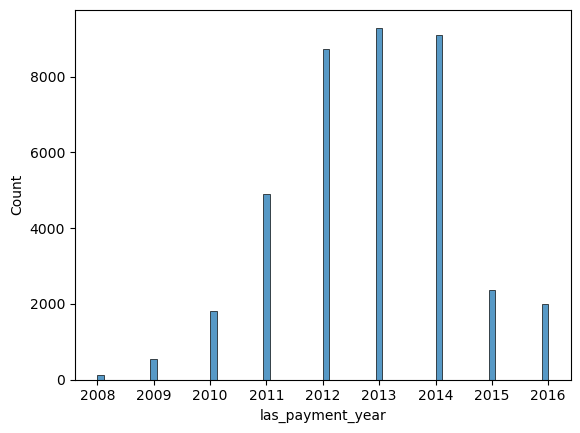

In [163]:
##Lets analyse another ordered categorical variable as loan payment date####
df['las_payment_year'] = df['last_pymnt_d'].dt.year
df['las_payment_month'] = df['last_pymnt_d'].dt.month
df = df.sort_values(by='las_payment_year')
sns.histplot(df['las_payment_year'])
plt.show()
#Number of payments done gradually increases from 2008 to 2013 where it peaks and then gradually decreases till 2016